# Homework 1

## Tara Wilson
## Data 515
## April 2020

----------

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors

# set font size for matplotlib plots
plt.rcParams.update({'font.size': 16})

-----------

### 1. Load & preview data

In [2]:
bicycle_data = pd.read_csv("../data/Fremont_Bridge_Bicycle_Counter.csv")

In [3]:
# view top 5 rows to make sure data was read in properly
bicycle_data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


----------

### 2. Add columns

In [4]:
# i. add column for total bicycle count (there is already a Fremont Bridge Total but adding a new one anyway for the sake of the assignment)
bicycle_data["East and West Total"] = bicycle_data["Fremont Bridge East Sidewalk"] + bicycle_data["Fremont Bridge West Sidewalk"]

In [5]:
# ii. add column for the hour of the day
bicycle_data["Hour of Day"] = pd.to_datetime(bicycle_data["Date"]).dt.hour

In [6]:
# iii. add column for the year
bicycle_data["Year"] = pd.to_datetime(bicycle_data["Date"]).dt.year

In [7]:
# preview dataframe to ensure columns were added properly
bicycle_data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,East and West Total,Hour of Day,Year
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,13.0,0,2012
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,10.0,1,2012
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2.0,2,2012
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,5.0,3,2012
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,7.0,4,2012


--------

### 3. Create subset

In [8]:
# subset only rows with Year == 2016
bicycle_data_2016 = bicycle_data[bicycle_data["Year"] == 2016]

In [9]:
# preview subsetted dataset
bicycle_data_2016.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,East and West Total,Hour of Day,Year
28440,01/01/2016 12:00:00 AM,18.0,9.0,9.0,18.0,0,2016
28441,01/01/2016 01:00:00 AM,15.0,3.0,12.0,15.0,1,2016
28442,01/01/2016 02:00:00 AM,11.0,6.0,5.0,11.0,2,2016
28443,01/01/2016 03:00:00 AM,7.0,1.0,6.0,7.0,3,2016
28444,01/01/2016 04:00:00 AM,2.0,0.0,2.0,2.0,4,2016


----------

### 4. Plot data

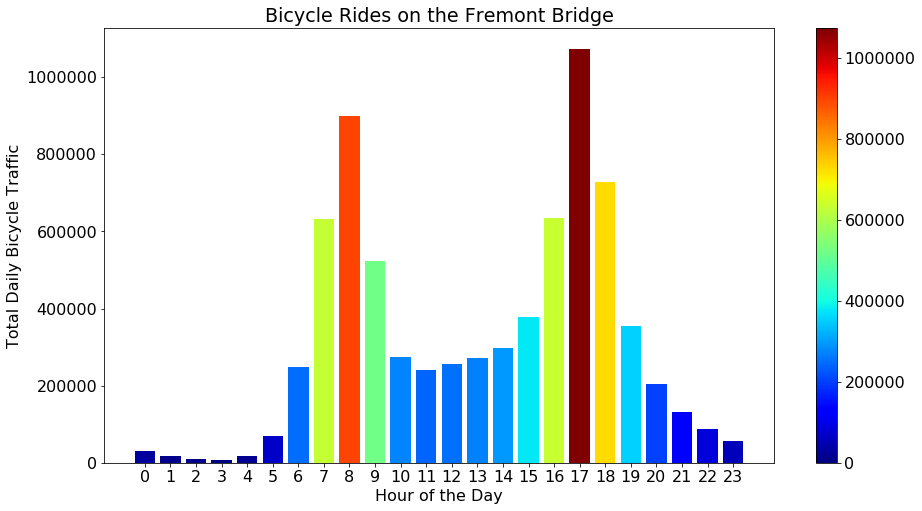

In [10]:
# sum daily counts by hour
totals_by_hour = bicycle_data.groupby("Hour of Day")["Fremont Bridge Total"].sum()
# convert daily sums back to a dataframe for plotting
totals_by_hour = pd.DataFrame(totals_by_hour).reset_index()

# use the matplotlib jet built in color scheme (example from: https://stackoverflow.com/questions/43009724/how-can-i-convert-numbers-to-a-color-scale-in-matplotlib)
cmap = plt.cm.jet
# assign colors values relative to the spread of the data
norm = matplotlib.colors.Normalize(vmin=0, vmax=max(totals_by_hour["Fremont Bridge Total"]))

# create figure and axis, set figure size
fig, ax = plt.subplots(figsize=(15,8))
# make matplotlib bar chart
ax.bar(x=totals_by_hour["Hour of Day"], height=totals_by_hour["Fremont Bridge Total"], color=cmap(norm(totals_by_hour["Fremont Bridge Total"].values)))
# force ticks to show for all hours for clarity
ax.set_xticks(totals_by_hour["Hour of Day"])

# set chart title and axis labels
plt.xlabel("Hour of the Day")
plt.ylabel("Total Daily Bicycle Traffic")
plt.title("Bicycle Rides on the Fremont Bridge")

# create and display color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)

plt.show()

We see there is a clear trend here for bike commuting. The peak traffic hours are 8 and 17, so 8:00 - 9:00 AM and 5:00 - 6:00 PM which are commong times for people to travel to and from the office. Bike traffic on the bridge significantly decreases over night.

---------

### 5. Find average

In [11]:
# group bicycle traffic totals by hour of the day and find means per day
avgs_by_hour = bicycle_data.groupby("Hour of Day")["Fremont Bridge Total"].mean()
# convert average data back to dataframe
avgs_by_hour = pd.DataFrame(avgs_by_hour)

# show row of dataframe with the max mean of bicycle traffic
avgs_by_hour[avgs_by_hour["Fremont Bridge Total"] == max(avgs_by_hour["Fremont Bridge Total"])]

,Fremont Bridge Total
Hour of Day,
17,392.289003


The busiest hour of the day, on average, is 17 so the 5:00 - 6:00 pm hour. This is consistant with what we see in the plot for #4 as the Hour 17 bar has the highest total counts by hour. This makes sense as it is a common time to be commuting home from work or going out to grab dinner.